# SparkEnv_Learning_01

In [1]:
import pyspark    # pyspark
import findspark  # findspark

In [2]:
findspark.init()
findspark.find() 

'C:\\Bigdata\\spark-2.4.5-bin-hadoop2.7'

## spark 세션을 생성해주기위해서 다음과 같이 컴파일을 진행해준다.  

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [4]:
conf = pyspark.SparkConf().setAppName('appName').setMaster('local[2]')

In [5]:
sc = pyspark.SparkContext(conf=conf)

In [6]:
spark = SparkSession(sc)

### 만약 세션이 끝난다면 다음과 같이 코드를 실행한다. 

In [7]:
# sc.stop()

# 스파크 성능 체크 

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

from pyspark import SparkContext

In [4]:
sc = SparkContext()

In [5]:
#  이미 스파크가 살아 있으면  죽였다가 다시  그게아니면 그냥 생성 

if sc is None:
    sc = SparkContext(master='local[2]', appName='1st app')
else:
    sc.stop()
    sc = SparkContext(master='local[2]', appName='1st app')


In [15]:
# performance check
spark_time_list = list()
python_time_list = list()
python_np_time_list = list()

n_list = [20000*i for i in range(0,10)]

 뭔가 안된다. 워닝이뜨는데 이유를 찾아보고 수정해보자 

수정하면 좋은거 

추가로 인풋 레코드는 모든 테스트에서 동일하게 공유하니까
케이스별 시간 측정 전(for문 시작 정도되면 좋겠네요)에 미리 만들어 두시고
변수로 가져다 쓰는 법을 생각해보자 

2. 스파크 master가 local로 세팅된 부분
스파크는 master를 local로 세팅할 경우 default로 1개의 워커만 생성합니다.
다행히 1개의 워커가 서버의 모든 cpu를 할당받으므로 멀티코어 프로세싱을 하겠지만
이는 스파크가 지향하는 분산 프로세싱과는 많은 차이가 있습니다.

여기서 주의할 점은 멀티코어 프로세싱과 분산(혹은 병렬) 프로세싱은 동일하지 않다는 부분입니다.
스파크는 하나의 데이터 세트(RDD)를 여러 파티션으로 자르고,
여러 워커들이 동시에 각 파티션을 분산 처리하는 방식으로 성능 향상을 취합니다.

본 테스트와 같이 워커가 하나일 경우
RDD를 단일 파티션으로 보고 통짜로 처리하여 분산처리는 전혀 이뤄지지 않고 있습니다.
이 경우 넘파이, 퓨어 파이썬, 스파크가 거의 동일한 형태로 멀티코어 프로세가싱할테니
큰 성능차이 있지않을 것으로 보입니다.

물론 본문에서 사용된 서버처럼 CPU가 싱글코어라면 의미가 없겠지만
하나의 서버로 스파크 테스트를 하시더라도 멀티코어 CPU를 사용하시는 분들은
아래와 같이 테스트 해보시면 좋을것 같습니다.

**
- local[\*] : 각 워커 당 1개의 코어가 할당되어 분산 처리, 워커 수 = 코어 수
- local[k] : 각 워커 당 [전체코어수/k]개의 코어가 할당되어 분산처리 , 워커 수 = k개
-> 궁금한점이 로컬안에 들어가는 숫자는 최소 몇개 최대 몇개이고 

(ref: https://stackoverflow.com/q...

이와 같이 실험였을 때도 성능차이가 나지않는다면
그때 또 추가적인 고찰을 해보면 좋을것 같습니다.

- map과 같이 간단한 step만 있었고, reduce, aggregation등의 step이 없어서
멀티코어 처리 대비 분산처리가 이득을 볼 수 없었다던가
- map이 취하는 함수가 너무 간단하였다던가
등으로 생각이 나네요

왜 범위를 왜 0부터 진행하는거지?

In [26]:
for n in n_list:
    # 무슨 함수 
    def each_ck(k):
        return 1/(16**k)*( 4/(8*k+1) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6))
    
    ## with spark 
    start_time = time.time()
    pi_approximated = sc.parallelize(range(1,n)).map(each_ck).sum()
    spark_time_list.append(time.time()-start_time)

    print(spark_time_list)

[1.0551550388336182]
[1.0551550388336182, 1.8430726528167725]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545, 23.64478611946106]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545, 23.64478611946106, 36.89451861381531]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545, 23.64478611946106, 36.89451861381531, 55.17049217224121]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545, 23.64478611946106, 36.89451861381531, 55.17049217224121, 76.9253659248352]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545, 23.64478611946106, 36.89451861381531, 55.17049217224121, 76.9253659248352, 99.73931860923767]
[1.0551550388336182, 1.8430726528167725, 6.422856569290161, 13.228625774383545, 23.64478611946106, 36.8945186138153

In [7]:
for n in n_list:
    # 무슨 함수 
    def each_ck(k):
        return 1/(16**k)*( 4/(8*k+1) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6))
    
    ## pure python
    start_time = time.time()
    pi_approximated = sum((each_ck(k) for k in range(1, n)))
    python_time_list.append(time.time()-start_time)
    
    print(python_time_list)

[0.0]
[0.0, 1.6496171951293945]
[0.0, 1.6496171951293945, 7.003277540206909]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633, 29.736497163772583]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633, 29.736497163772583, 46.33310055732727]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633, 29.736497163772583, 46.33310055732727, 72.55824494361877]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633, 29.736497163772583, 46.33310055732727, 72.55824494361877, 97.96029543876648]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633, 29.736497163772583, 46.33310055732727, 72.55824494361877, 97.96029543876648, 124.39941215515137]
[0.0, 1.6496171951293945, 7.003277540206909, 16.669435501098633, 29.736497163772583, 46.33310055732727, 72.55824494361877, 97.96029543876648, 124.39941215515137, 156.4347665309906]


In [11]:
for n in n_list:
    # 무슨 함수 
    def each_ck(k):
        return 1/(16**k)*( 4/(8*k+1) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6))
    
    ## with numpy
    start_time = time.time()
    pi_approximated = np.apply_along_axis(arr=np.array(range(1,n)), func1d=each_ck, axis=0).sum()
    python_np_time_list.append(time.time() - start_time)


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [12]:
python_np_time_list

[0.000997304916381836,
 0.00399017333984375,
 0.005982875823974609,
 0.009981393814086914,
 0.013954877853393555,
 0.017957210540771484,
 0.0229339599609375,
 0.025981426239013672,
 0.029869556427001953,
 0.03390932083129883,
 0.0,
 0.004004716873168945,
 0.0059986114501953125,
 0.010940313339233398,
 0.013963460922241211,
 0.017950773239135742,
 0.02094411849975586,
 0.027954578399658203,
 0.029921531677246094,
 0.03490400314331055,
 0.0,
 0.004004478454589844,
 0.007964134216308594,
 0.009973526000976562,
 0.013989686965942383,
 0.016956806182861328,
 0.02094578742980957,
 0.026924848556518555,
 0.02991962432861328,
 0.03288459777832031]

In [16]:
for n in n_list:
    # 무슨 함수 
    def each_ck(k):
        return 1/(16**k)*( 4/(8*k+1) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6))
    
    ## with spark 
    start_time = time.time()
    pi_approximated = sc.parallelize(range(0,n)).map(each_ck).sum()
    spark_time_list.append(time.time()-start_time)
    print(spark_time_list)
    
    ## pure python
    start_time = time.time()
    pi_approximated = sum((each_ck(k) for k in range(0, n)))
    python_time_list.append(time.time()-start_time)
    print(python_time_list)
    ## with numpy
    
    start_time = time.time()
    pi_approximated = np.apply_along_axis(arr=np.array(range(0,n)), func1d=each_ck, axis=0).sum()
    python_np_time_list.append(time.time() - start_time)
    print(python_np_time_list)

[1.048198938369751]
[0.0]
[0.0]
[1.048198938369751, 1.8650119304656982]
[0.0, 1.6246802806854248]
[0.0, 0.0029990673065185547]


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


[1.048198938369751, 1.8650119304656982, 6.777872323989868]
[0.0, 1.6246802806854248, 7.3181703090667725]
[0.0, 0.0029990673065185547, 0.005984067916870117]
[1.048198938369751, 1.8650119304656982, 6.777872323989868, 13.655477285385132]
[0.0, 1.6246802806854248, 7.3181703090667725, 16.260541677474976]
[0.0, 0.0029990673065185547, 0.005984067916870117, 0.008976936340332031]
[1.048198938369751, 1.8650119304656982, 6.777872323989868, 13.655477285385132, 24.842554330825806]
[0.0, 1.6246802806854248, 7.3181703090667725, 16.260541677474976, 29.375492572784424]
[0.0, 0.0029990673065185547, 0.005984067916870117, 0.008976936340332031, 0.012964963912963867]
[1.048198938369751, 1.8650119304656982, 6.777872323989868, 13.655477285385132, 24.842554330825806, 36.528263092041016]
[0.0, 1.6246802806854248, 7.3181703090667725, 16.260541677474976, 29.375492572784424, 45.84051489830017]
[0.0, 0.0029990673065185547, 0.005984067916870117, 0.008976936340332031, 0.012964963912963867, 0.016952991485595703]
[1.04

In [17]:
## plotting

df = pd.DataFrame({
    'spark':spark_time_list.copy(),
    'pure python': python_time_list.copy(),
    'python with numpy': python_np_time_list.copy()
}, index=n_list)

No handles with labels found to put in legend.


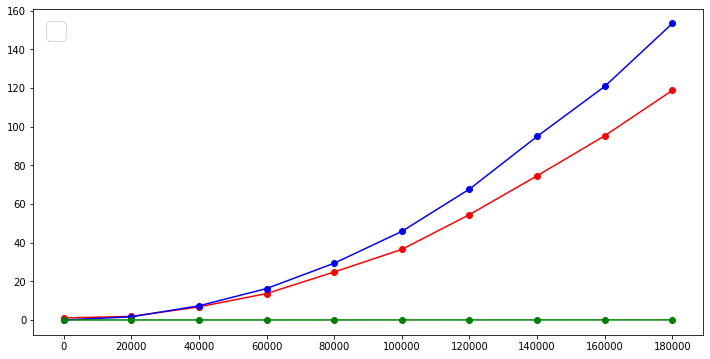

In [18]:
# 그래프 그리기 
plt.figure(figsize=(12,6))
plt.plot(df['spark'], 'ro-'), plt.plot(df['pure python'],'bo-'), plt.plot(df['python with numpy'],'go-')
plt.legend(fontsize=25)
plt.xticks(n_list,n_list)
# plt.savefig('./grp.svg')
plt.show()